In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all';


In [2]:

df = pd.read_csv("survey_results_public.csv", header=0,
                 usecols=[ 'Age','WorkWeekHrs', 'CodeRevHrs', 'ConvertedComp', 'CompTotal' ])

In [3]:
df

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
0,NaN,NaN,NaN,NaN,14.0
1,NaN,NaN,NaN,NaN,19.0
2,23000.0,8820.0,40.0,NaN,28.0
3,61000.0,61000.0,80.0,NaN,22.0
4,NaN,NaN,55.0,NaN,30.0
...,...,...,...,...,...
2994,NaN,NaN,40.0,4.0,NaN
2995,23000.0,75876.0,45.0,3.0,29.0
2996,NaN,NaN,NaN,NaN,20.0
2997,90000.0,1080000.0,80.0,NaN,31.0


In [4]:
df = df.dropna()

In [5]:
df.dtypes

CompTotal        float64
ConvertedComp    float64
WorkWeekHrs      float64
CodeRevHrs       float64
Age              float64
dtype: object

In [6]:
corr = df.corr()

In [7]:
corr

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
CompTotal,1.000000,-0.028891,-0.015671,-0.026525,0.016447
ConvertedComp,-0.028891,1.000000,-0.004572,-0.073048,0.099926
WorkWeekHrs,-0.015671,-0.004572,1.000000,0.027850,-0.005370
CodeRevHrs,-0.026525,-0.073048,0.027850,1.000000,-0.039880
Age,0.016447,0.099926,-0.005370,-0.039880,1.000000


In [8]:
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
CompTotal,1,-0.0288913,-0.0156712,-0.0265245,0.0164472
ConvertedComp,-0.0288913,1,-0.00457201,-0.0730475,0.0999257
WorkWeekHrs,-0.0156712,-0.00457201,1,0.0278498,-0.00536956
CodeRevHrs,-0.0265245,-0.0730475,0.0278498,1,-0.0398802
Age,0.0164472,0.0999257,-0.00536956,-0.0398802,1


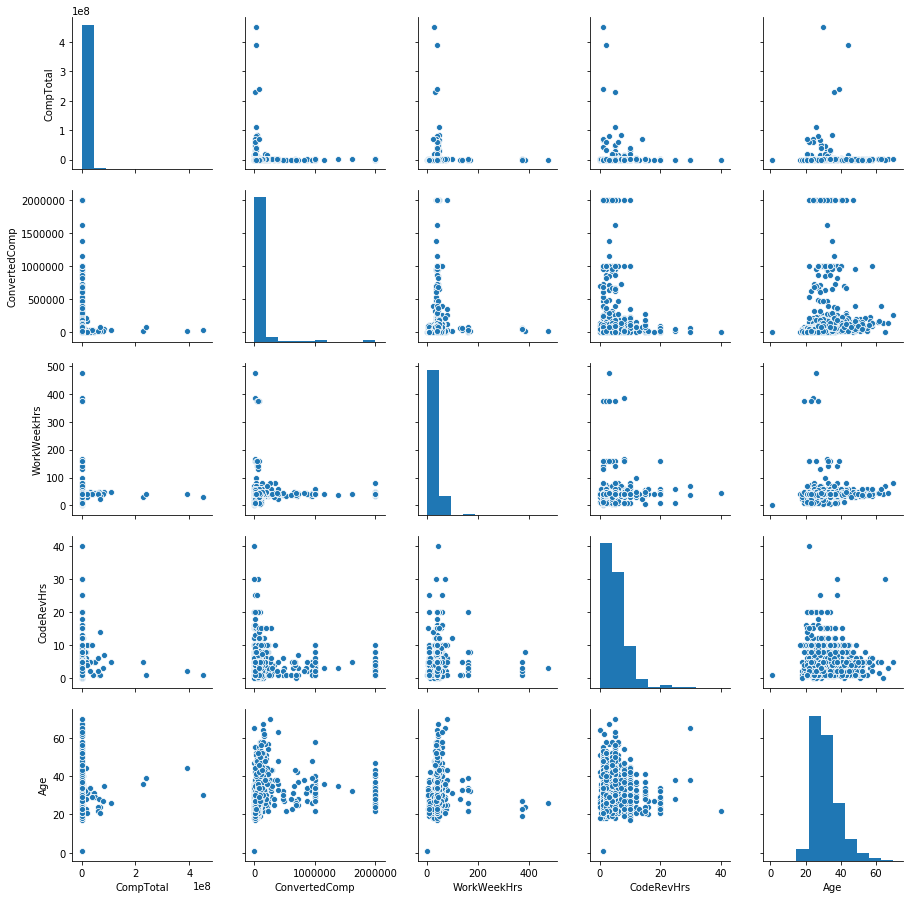

In [9]:
sns.pairplot(df, kind="scatter")

In [10]:
df = pd.read_csv("survey_results_public.csv", header=0,
                 usecols=[ 'Age','WorkWeekHrs', 'ConvertedComp','Hobbyist', "Gender" ])
df = df.dropna()

In [11]:
df.set_index("ConvertedComp")

,Hobbyist,WorkWeekHrs,Age,Gender
ConvertedComp,,,,
8820.0,Yes,40.0,28.0,Man
61000.0,No,80.0,22.0,Man
366420.0,Yes,15.0,28.0,Man
95179.0,Yes,32.0,23.0,Man
90000.0,Yes,40.0,28.0,Man
...,...,...,...,...
8184.0,Yes,9.0,23.0,Man
43180.0,Yes,40.0,33.0,Man
75876.0,Yes,45.0,29.0,Man


In [12]:
map_function = {'Yes': 1, 'No': 0}
df['Hobbyist'] = df['Hobbyist'].map(map_function)

In [13]:
df

,Hobbyist,ConvertedComp,WorkWeekHrs,Age,Gender
2,1,8820.0,40.0,28.0,Man
3,0,61000.0,80.0,22.0,Man
5,1,366420.0,15.0,28.0,Man
8,1,95179.0,32.0,23.0,Man
12,1,90000.0,40.0,28.0,Man
...,...,...,...,...,...
2990,1,8184.0,9.0,23.0,Man
2993,1,43180.0,40.0,33.0,Man
2995,1,75876.0,45.0,29.0,Man
2997,1,1080000.0,80.0,31.0,Man


In [14]:
df["Gender"].unique()

array(['Man', 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming'],
      dtype=object)

In [15]:
df = df[df['Gender'].isin(['Woman', 'Man'])]
df = pd.get_dummies(df, columns=['Gender'])

In [16]:
df

,Hobbyist,ConvertedComp,WorkWeekHrs,Age,Gender_Man,Gender_Woman
2,1,8820.0,40.0,28.0,1,0
3,0,61000.0,80.0,22.0,1,0
5,1,366420.0,15.0,28.0,1,0
8,1,95179.0,32.0,23.0,1,0
12,1,90000.0,40.0,28.0,1,0
...,...,...,...,...,...,...
2990,1,8184.0,9.0,23.0,1,0
2993,1,43180.0,40.0,33.0,1,0
2995,1,75876.0,45.0,29.0,1,0
2997,1,1080000.0,80.0,31.0,1,0


In [17]:
z = np.abs(stats.zscore(df))
print(z)

[[0.51681139 0.40832961 0.1076285  0.44134231 0.28885089 0.28885089]
 [1.93494186 0.23298947 1.36637417 1.21122102 0.28885089 0.28885089]
 [0.51681139 0.79331151 1.02888017 0.44134231 0.28885089 0.28885089]
 ...
 [0.51681139 0.18300174 0.07662183 0.31302919 0.28885089 0.28885089]
 [0.51681139 3.19115008 1.36637417 0.05640296 0.28885089 0.28885089]
 [0.51681139 0.35715905 0.1076285  1.0829079  0.28885089 0.28885089]]


In [18]:
print(z < 3)

[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 ...
 [ True  True  True  True  True  True]
 [ True False  True  True  True  True]
 [ True  True  True  True  True  True]]


In [19]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Hobbyist             0.0
ConvertedComp    72733.5
WorkWeekHrs          4.0
Age                  9.0
Gender_Man           0.0
Gender_Woman         0.0
dtype: float64


In [20]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(993, 6)

In [21]:
df_out_z = df[(z < 3).all(axis = 1)]

In [22]:
df_out_z

,Hobbyist,ConvertedComp,WorkWeekHrs,Age,Gender_Man,Gender_Woman
2,1,8820.0,40.0,28.0,1,0
3,0,61000.0,80.0,22.0,1,0
5,1,366420.0,15.0,28.0,1,0
8,1,95179.0,32.0,23.0,1,0
12,1,90000.0,40.0,28.0,1,0
...,...,...,...,...,...,...
2989,1,6996.0,40.0,24.0,1,0
2990,1,8184.0,9.0,23.0,1,0
2993,1,43180.0,40.0,33.0,1,0
2995,1,75876.0,45.0,29.0,1,0


In [23]:
corr = df_out_z.corr()
corr

,Hobbyist,ConvertedComp,WorkWeekHrs,Age,Gender_Man,Gender_Woman
Hobbyist,1.000000,0.001174,0.017962,-0.042646,NaN,NaN
ConvertedComp,0.001174,1.000000,0.069417,0.152018,NaN,NaN
WorkWeekHrs,0.017962,0.069417,1.000000,0.087599,NaN,NaN
Age,-0.042646,0.152018,0.087599,1.000000,NaN,NaN
Gender_Man,NaN,NaN,NaN,NaN,NaN,NaN
Gender_Woman,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# regression wit 1 numeric variable

X = df_out[['WorkWeekHrs']]
y = df_out[['ConvertedComp']]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
regr = LinearRegression()  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
#To retrieve the intercept:
print(regr.intercept_)
#For retrieving the slope:
print(regr.coef_)

[40136.79259124]
[[571.42833906]]


In [28]:
y_pred = regr.predict(X_test)

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 33547.36013387717
Mean Squared Error: 1684278111.180039
Root Mean Squared Error: 41039.957494861505


In [30]:
# regression with 2 numeric variables

X = df_out[['Age', 'WorkWeekHrs']].values
y = df_out['ConvertedComp'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
regr = LinearRegression()  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
#To retrieve the intercept:
print(regr.intercept_)
#For retrieving the slope:
print(regr.coef_)

-37307.74148949473
[2608.97244495  521.27682102]


In [34]:
y_pred = regr.predict(X_test)

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 30834.62357244971
Mean Squared Error: 1435948823.1607807
Root Mean Squared Error: 37893.91538440942


In [36]:
# regression for 4 variables

X = df_out[['Age', 'WorkWeekHrs', 'Hobbyist', 'Gender_Man', 'Gender_Woman']].values
y = df_out['ConvertedComp'].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
regr = LinearRegression()  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_pred = regr.predict(X_test)

In [40]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(25)

,Actual,Predicted
0,19590.0,48767.642475
1,190000.0,48767.642475
2,16788.0,53980.410685
3,82494.0,69639.422034
4,115000.0,90511.201594
5,43180.0,51376.614920
6,0.0,77461.162690
7,80000.0,55028.141007
8,51468.0,72248.394479
9,21119.0,69639.422034


In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 30834.62357244972
Mean Squared Error: 1435948823.160781
Root Mean Squared Error: 37893.91538440942


In [42]:
# predicting salary of 30 y.o. man who works 50 hours per week and is a hobbyist 

vec = [[30, 50,1,1,0]]

In [43]:
regr.predict(vec)

array([67025.27290977])